# Apprentice Chef Analysis Assignment 

This is a project based on the case of Apprentice Chef Inc. A company with an innovative way to cook at home in an easy and fun process.

The purpose of this analysis is to understand and define the variables that affect the revenue of the company according to the numbers obtained by each of the 1946 clients on the data set, using different techniques of statistics and machine learning for the analysis. The goal is to uncover insights into the company's operations and suggest opportunities for grow.

Through a comprehensive process of querying, sampling, and verification, identify the aspects that have the biggest influence on affecting the revenue. For companies aiming to increase sales and boost their bottom line, this investigation will offer insightful information.

#  Analysis of my Data

Starting with the analysis and count of my data, importing the excel data file to the file and importing all the packages to use in the assignment:

In [1]:
#Starting by importing all the libraries necessary for the analysis
import pandas            as pd
import matplotlib.pyplot as plt
import seaborn           as sns


# importing model types
import sklearn.linear_model              
from sklearn.linear_model import LinearRegression # linear models for you to enjoy
from sklearn.tree     import DecisionTreeRegressor     # regression trees... also to enjoy
from sklearn.ensemble import RandomForestRegressor     # random forest is enjoyable as well
from sklearn.ensemble import GradientBoostingRegressor # ...and so is this one
from sklearn.model_selection import train_test_split # train-test split
from sklearn.linear_model import LogisticRegression  # logistic regression
import statsmodels.formula.api as smf                # logistic regression
from sklearn.metrics import confusion_matrix         # confusion matrix
from sklearn.metrics import roc_auc_score            # auc score
from sklearn.neighbors import KNeighborsClassifier   # KNN for classification
from sklearn.neighbors import KNeighborsRegressor    # KNN for regression
from sklearn.preprocessing import StandardScaler     # standard scaler
from sklearn.tree import DecisionTreeClassifier      # classification trees
from sklearn.tree import plot_tree                   # tree plots
from sklearn.ensemble import RandomForestClassifier     # random forest
from sklearn.ensemble import GradientBoostingClassifier # gbm
from sklearn.model_selection import RandomizedSearchCV # hyperparameter tuning
from sklearn.metrics import make_scorer                #make scorer


# setting pandas print options
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)


# specifying the path and file name
file = 'Apprentice_Chef_Dataset_2023.xlsx'


# reading the file into Python
apprentice_chef = pd.read_excel(file)

# checking the file
apprentice_chef.head(n = 5)


,REVENUE,NAME,EMAIL,FIRST_NAME,FAMILY_NAME,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,Steffon Baratheon,steffon.baratheon@yahoo.com,Steffon,Baratheon,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,Harlon Greyjoy,harlon.greyjoy@visa.com,Harlon,Greyjoy,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,Monster,monster@protonmail.com,Monster,Monster,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,Damon Lannister (lord),damon.lannister.(lord)@yahoo.com,Damon,Lannister,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,Raynald Westerling,raynald.westerling@jnj.com,Raynald,Westerling,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


On the dataset the table show me the information of the customers and the information needed to my analysis. The exploration of the data is an essential part to begin my analysis. 

In [3]:
# Analyzing how many customers i need to analyze and the number of features to count. 
# formatting and printing the dimensions of the dataset
print(f"""
Size of Original Dataset
------------------------
Observations: {apprentice_chef.shape[0]}
Features:     {apprentice_chef.shape[1]}
""")


Size of Original Dataset
------------------------
Observations: 1946
Features:     19



A value of 1946 customers with 19 variables that will be my features to analyze. These variables are:

In [4]:
# Viewing the data frame to detect the type of each variable
apprentice_chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   NAME                         1946 non-null   object 
 2   EMAIL                        1946 non-null   object 
 3   FIRST_NAME                   1946 non-null   object 
 4   FAMILY_NAME                  1900 non-null   object 
 5   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 6   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 7   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 8   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 9   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 10  CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 11  PC_LOGINS                    1946 non-null   int64  
 12  MOBILE_LOGINS                1946 non-null   int64  
 13  WEEKLY_PLAN       

Ordering my variables according to the category of the data, if is continous, interval, count or categorical, to separate the data into groups.

In [5]:
# Getting the variables on the dataset to group by categories
#using a loop to print column names one by one to see which ones are the 
#variables to consider into the analysis 
for column in apprentice_chef:
    print(column)

REVENUE
NAME
EMAIL
FIRST_NAME
FAMILY_NAME
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH
CONTACTS_W_CUSTOMER_SERVICE
PRODUCT_CATEGORIES_VIEWED
AVG_TIME_PER_SITE_VISIT
CANCELLATIONS_AFTER_NOON
PC_LOGINS
MOBILE_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES 
AVG_PREP_VID_TIME
LARGEST_ORDER_SIZE
AVG_MEAN_RATING
TOTAL_PHOTOS_VIEWED


In [ ]:
#To understand which are the groups of the data:
    
CONTINUOUS
------------
REVENUE   (Y-variable)
AVG_TIME_PER_SITE_VISIT 
AVG_PREP_VID_TIME
AVG_MEAN_RATING
  

INTERVAL/COUNT
--------------
TOTAL_MEALS_ORDERED
UNIQUE_MEALS_PURCH  
CONTACTS_W_CUSTOMER_SERVICE 
PC_LOGINS
WEEKLY_PLAN
LATE_DELIVERIES
LARGEST_ORDER_SIZE
TOTAL_PHOTOS_VIEWED 

CATEGORICAL/OTHER
-----------------
NAME 
EMAIL
FIRST_NAME
FAMILY_NAME

In [6]:
# descriptive statistics for numeric data
apprentice_chef.describe(include = 'number').round(2)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00


In [7]:
# creating a list of continuous features (including REVENUE)
continuous_data = ['REVENUE', 'AVG_TIME_PER_SITE_VISIT', 'AVG_PREP_VID_TIME', 'AVG_MEAN_RATING']

# developing a correlation matrix based on continuous features
apprentice_chef_corr = apprentice_chef[continuous_data].corr(method = 'pearson')

# filtering the results to only show correlations with REVENUE
apprentice_chef_corr.loc[ : , 'REVENUE'].round(decimals = 2).sort_values(ascending = False)

REVENUE                    1.00
AVG_TIME_PER_SITE_VISIT    0.64
AVG_PREP_VID_TIME          0.14
AVG_MEAN_RATING           -0.55
Name: REVENUE, dtype: float64

Develop a scatter plot between REVENUE and the variable with the strongest correlation AVERAGE TIME PER SITE VISIT.

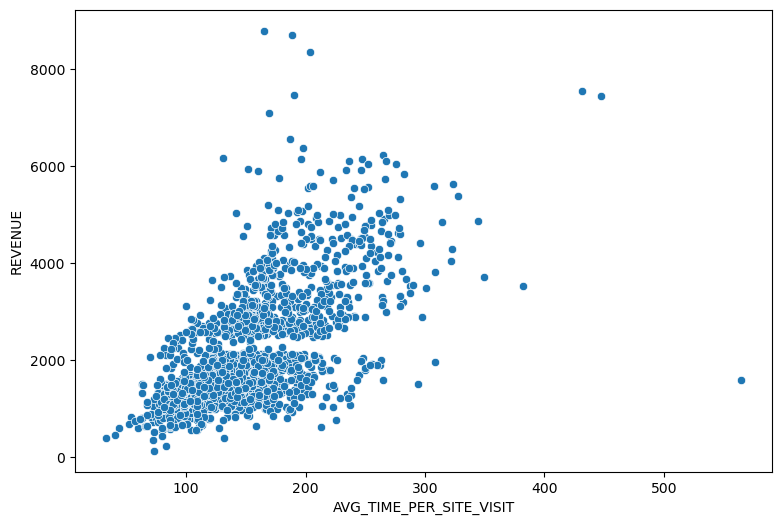

In [8]:
# setting figure size
fig, ax = plt.subplots(figsize = (9, 6))


# developing a scatterplot
sns.scatterplot(x    = 'AVG_TIME_PER_SITE_VISIT',
                y    = 'REVENUE',
                data = apprentice_chef)


# SHOWing the results
plt.show()

Is important to understand how my scatterplot with the strongest correlated variable (revenue and the average time a customer spends on a website) means that as the average time a customer spends on the website increases, the revenue also tends to increase. This could suggest that customers who spend more time on the website are more engaged and may be more likely to make a purchase.

However, it's important to note that correlation does not prove causality, and there could be other factors that are driving both the increase in average time spent on the website and the increase in revenue. For example, it could be that customers who are more likely to make a purchase also tend to spend more time on the website, or that the website is offering more enticing or relevant content to customers, causing them to spend more time on the site and increasing the likelihood of a purchase.

# Cleaning the Data

Understanding that the data have 46 null values on the column of family_name, replacing the null values. Flagging the missing values on the dataset to identify my data that needs to be replaced.

In [9]:
#Viweing the missing values 
apprentice_chef.isnull().any()

REVENUE                        False
NAME                           False
EMAIL                          False
FIRST_NAME                     False
FAMILY_NAME                     True
TOTAL_MEALS_ORDERED            False
UNIQUE_MEALS_PURCH             False
CONTACTS_W_CUSTOMER_SERVICE    False
PRODUCT_CATEGORIES_VIEWED      False
AVG_TIME_PER_SITE_VISIT        False
CANCELLATIONS_AFTER_NOON       False
PC_LOGINS                      False
MOBILE_LOGINS                  False
WEEKLY_PLAN                    False
LATE_DELIVERIES                False
AVG_PREP_VID_TIME              False
LARGEST_ORDER_SIZE             False
AVG_MEAN_RATING                False
TOTAL_PHOTOS_VIEWED            False
dtype: bool

The importance to understand that the nulls are present on the column of FAMILY_NAME, which need to be "cleaned" next.

In [10]:
# taking the apprentice_chef dataset
# and then filling a value if is is null
# summing together the results per column
apprentice_chef.isnull().sum(axis = 0)

REVENUE                         0
NAME                            0
EMAIL                           0
FIRST_NAME                      0
FAMILY_NAME                    46
TOTAL_MEALS_ORDERED             0
UNIQUE_MEALS_PURCH              0
CONTACTS_W_CUSTOMER_SERVICE     0
PRODUCT_CATEGORIES_VIEWED       0
AVG_TIME_PER_SITE_VISIT         0
CANCELLATIONS_AFTER_NOON        0
PC_LOGINS                       0
MOBILE_LOGINS                   0
WEEKLY_PLAN                     0
LATE_DELIVERIES                 0
AVG_PREP_VID_TIME               0
LARGEST_ORDER_SIZE              0
AVG_MEAN_RATING                 0
TOTAL_PHOTOS_VIEWED             0
dtype: int64

From here there are 46 values are null in the FAMILY_NAME column for which is replaced with the label "Unknown".

In [11]:
# Filling all the nulls with a new label "Unknown"
#instantiating an imputation value
fill = 'Unknown'

# imputing 'FAMILY_NAME'
apprentice_chef['FAMILY_NAME'] = apprentice_chef['FAMILY_NAME'].fillna(fill)

In [12]:
# Checking that all the nulls have been replaced in the dataset
apprentice_chef.isnull().sum(axis = 0)

REVENUE                        0
NAME                           0
EMAIL                          0
FIRST_NAME                     0
FAMILY_NAME                    0
TOTAL_MEALS_ORDERED            0
UNIQUE_MEALS_PURCH             0
CONTACTS_W_CUSTOMER_SERVICE    0
PRODUCT_CATEGORIES_VIEWED      0
AVG_TIME_PER_SITE_VISIT        0
CANCELLATIONS_AFTER_NOON       0
PC_LOGINS                      0
MOBILE_LOGINS                  0
WEEKLY_PLAN                    0
LATE_DELIVERIES                0
AVG_PREP_VID_TIME              0
LARGEST_ORDER_SIZE             0
AVG_MEAN_RATING                0
TOTAL_PHOTOS_VIEWED            0
dtype: int64

After the replacement of the null values,and checking all the replaced values, and dropping the strings or non-numerical data, as it will not be necessary for the regressions to be runned.

In [13]:
## Drop the variables that are not numeric, because are not needed for the analysis
apprentice_chef = apprentice_chef.drop(['NAME',
                                            'EMAIL',
                                                'FIRST_NAME',
                                                         'FAMILY_NAME'], axis = 1)
apprentice_chef.head(n = 5)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,LARGEST_ORDER_SIZE,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED
0,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456
1,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680
2,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145
3,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418
4,3427.5,276,7,1,10,164.6,0,6,1,14,0,34.42,3,3.157895,174


According to the data dictionary the label that need to be renamed is LARGEST_ORDER_SIZE, renamed for AVERAGE_MEAL_ORDER_CUSTOMER

In [14]:
# making sure all missing values have been taken care of
apprentice_chef.isnull().any().any()

False

In [15]:
#rename the column to change the mislabel in the column LARGEST_ORDER_SIZE
apprentice_chef.rename(columns={'LARGEST_ORDER_SIZE': 'AVERAGE_MEAL_ORDER_CUSTOMER'}, inplace=True)


print(apprentice_chef['AVERAGE_MEAL_ORDER_CUSTOMER'])

0       6
1       5
2       3
3       6
4       3
       ..
1941    5
1942    5
1943    6
1944    6
1945    5
Name: AVERAGE_MEAL_ORDER_CUSTOMER, Length: 1946, dtype: int64


I analyze and see from all the variables which ones have the higher correlation coefficients to use the variables and create futures for my analysis.

In [16]:
#Checking the correlation the variables have with the response variable as part of the analysis. 
apprentice_chef_corr = apprentice_chef.corr(method= "pearson").round(decimals = 2)
apprentice_chef_corr["REVENUE"].sort_values(ascending = False)

REVENUE                        1.00
AVG_TIME_PER_SITE_VISIT        0.64
TOTAL_MEALS_ORDERED            0.60
TOTAL_PHOTOS_VIEWED            0.46
AVERAGE_MEAL_ORDER_CUSTOMER    0.44
CONTACTS_W_CUSTOMER_SERVICE    0.17
AVG_PREP_VID_TIME              0.14
UNIQUE_MEALS_PURCH             0.10
MOBILE_LOGINS                  0.07
PRODUCT_CATEGORIES_VIEWED      0.03
PC_LOGINS                      0.02
WEEKLY_PLAN                    0.01
CANCELLATIONS_AFTER_NOON       0.00
LATE_DELIVERIES               -0.02
AVG_MEAN_RATING               -0.55
Name: REVENUE, dtype: float64

Develop the features between the values with higher correlation to see if it also establishing causality. The variables with higher score in correlation been the average time per site visit, and the total meals ordered, following by the total photos viewed. Variables that been considered for the next part of feature engineering and to create new features that include these numbers to see if its beneficial.

# Feature Engineering

Engineering different new features with different ratios to try get beneficial values.All the new features are considering at least one variable with a high score which will be tested to get a higher Rsquared value on the following steps.

1.Total Unique Meals: Considering the Unique Meals Purchased divided by the Total Meal Ordered. This new feature is considering one of the highest correlated in last part.  

2.Photo per Meal: Ratio considering Total photos viewed divided by the Totals meals ordered. This new feature is considering the thirds correlated value of total photos viewed.

3.Total Logins: A ratio that sum the logins into the platforms (PC and mobile). This feature could suggest the engagement with the site as an important factor driving the sales of the company. 

4.Average Visit Duration: Using the variables of Product categories viewed divided by the average time per visit.  This new feature is using the higher correlated feature (AVG_TIME_PER_SITE_VISIT) which I believe will help me get a desired value for the models.

5.Average Orders Per Visit: Total meals ordered divided by the average time per site visit. This feature is also using the variables with highest score on the correlation with the revenue.


In [17]:
#Creating features:

#Feature 1. Total Unique Meals: We engineer a feature to calculate the average of Unique Meals Purchased/Total Meal Ordered
apprentice_chef['TOTAL_UNIQUE_MEALS'] = apprentice_chef['UNIQUE_MEALS_PURCH']/apprentice_chef['TOTAL_MEALS_ORDERED']

#Feature 2. Photo per Meal Ratio: Total photos viewed / Totals meals ordered
apprentice_chef['PHOTO_PER_MEAL_ORD'] = apprentice_chef['TOTAL_PHOTOS_VIEWED']/apprentice_chef['TOTAL_MEALS_ORDERED']

#Feature 3. Total Logins: PC logins + mobile logins 
apprentice_chef['TOTAL_LOGINS'] = apprentice_chef['PC_LOGINS']+apprentice_chef['MOBILE_LOGINS']

#Feature 4.  Average Visit Duration per Product View: Product categories viewed / avg time per visit 
apprentice_chef['AVG_VISIT_DURATION_PER_VIEW'] = apprentice_chef['PRODUCT_CATEGORIES_VIEWED']+apprentice_chef['AVG_TIME_PER_SITE_VISIT']

#Feature 5. Average Meals Ordered by avg time visit: Total meals ordered/ Average time per site visit 
apprentice_chef['AVG_ORDERS_PER_VISIT'] = apprentice_chef['TOTAL_MEALS_ORDERED']/apprentice_chef['AVG_TIME_PER_SITE_VISIT']

apprentice_chef.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1946 entries, 0 to 1945
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   REVENUE                      1946 non-null   float64
 1   TOTAL_MEALS_ORDERED          1946 non-null   int64  
 2   UNIQUE_MEALS_PURCH           1946 non-null   int64  
 3   CONTACTS_W_CUSTOMER_SERVICE  1946 non-null   int64  
 4   PRODUCT_CATEGORIES_VIEWED    1946 non-null   int64  
 5   AVG_TIME_PER_SITE_VISIT      1946 non-null   float64
 6   CANCELLATIONS_AFTER_NOON     1946 non-null   int64  
 7   PC_LOGINS                    1946 non-null   int64  
 8   MOBILE_LOGINS                1946 non-null   int64  
 9   WEEKLY_PLAN                  1946 non-null   int64  
 10  LATE_DELIVERIES              1946 non-null   int64  
 11  AVG_PREP_VID_TIME            1946 non-null   float64
 12  AVERAGE_MEAL_ORDER_CUSTOMER  1946 non-null   int64  
 13  AVG_MEAN_RATING   

Creating my new features, and adding them in the info of my data, and checking the first rows of my table to confirm are there

In [18]:
#Checking my new features in the table
#Last 5 columns of my table
apprentice_chef.head(n = 4)

,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,AVERAGE_MEAL_ORDER_CUSTOMER,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,TOTAL_UNIQUE_MEALS,PHOTO_PER_MEAL_ORD,TOTAL_LOGINS,AVG_VISIT_DURATION_PER_VIEW,AVG_ORDERS_PER_VISIT
0,4920.0,493,9,1,10,265.6,5,5,2,0,0,137.41,6,2.894737,456,0.018256,0.924949,7,275.6,1.856175
1,6150.0,361,9,1,6,247.0,2,5,1,0,0,120.20,5,2.631579,680,0.024931,1.883657,6,253.0,1.461538
2,3435.0,278,6,1,4,164.4,0,6,1,5,0,127.00,3,3.684211,145,0.021583,0.521583,7,168.4,1.690998
3,3330.0,269,8,1,2,176.0,5,5,2,0,0,129.78,6,3.157895,418,0.029740,1.553903,7,178.0,1.528409


Run the skew to identify the variables that need to create a logarithmic transforming a variable to reduce skewness and make the distribution more symmetrical. It is better for variables with positive skewness values. 

In [19]:
# understand and analyze the skew values so see which of my float variables i have to convert into log and convert my 0 into 0.001 to run my regressions 
round(apprentice_chef.skew(), ndigits =1) 

REVENUE                        1.6
TOTAL_MEALS_ORDERED            2.0
UNIQUE_MEALS_PURCH             0.6
CONTACTS_W_CUSTOMER_SERVICE    0.4
PRODUCT_CATEGORIES_VIEWED      0.2
AVG_TIME_PER_SITE_VISIT        1.2
CANCELLATIONS_AFTER_NOON       1.4
PC_LOGINS                     -0.0
MOBILE_LOGINS                  0.1
WEEKLY_PLAN                    1.5
LATE_DELIVERIES                1.7
AVG_PREP_VID_TIME              9.6
AVERAGE_MEAL_ORDER_CUSTOMER    0.7
AVG_MEAN_RATING               -0.1
TOTAL_PHOTOS_VIEWED            2.6
TOTAL_UNIQUE_MEALS             2.4
PHOTO_PER_MEAL_ORD             6.4
TOTAL_LOGINS                   0.0
AVG_VISIT_DURATION_PER_VIEW    1.2
AVG_ORDERS_PER_VISIT           1.4
dtype: float64

Using a log transformation with the skewed postive and negative values. The goal is to normalize the distribution of my data to reduce and improve the impact of the variance.an improve the performance of statistical models. The next code shows the process of the log into the skewed values.

In [20]:
# Log transforming variables with skew more than 1 or -1 and saving it to the dataset to help and improve the impact of the model
apprentice_chef['log_REVENUE'] = np.log(apprentice_chef['REVENUE']+ 0.001)
apprentice_chef['log_TOTAL_MEALS_ORDERED'] = np.log(apprentice_chef['TOTAL_MEALS_ORDERED'] + 0.001)
apprentice_chef['log_AVG_TIME_PER_SITE_VISIT'] = np.log(apprentice_chef['AVG_TIME_PER_SITE_VISIT'] + 0.001)
apprentice_chef['log_CANCELLATIONS_AFTER_NOON'] = np.log(apprentice_chef['CANCELLATIONS_AFTER_NOON'] + 0.001)
apprentice_chef['log_WEEKLY_PLAN'] = np.log(apprentice_chef['WEEKLY_PLAN'] + 0.001)
apprentice_chef['log_LATE_DELIVERIES '] = np.log(apprentice_chef['LATE_DELIVERIES '] + 0.001)
apprentice_chef['log_AVG_PREP_VID_TIME'] = np.log(apprentice_chef['AVG_PREP_VID_TIME'] + 0.001)
apprentice_chef['log_TOTAL_PHOTOS_VIEWED'] = np.log(apprentice_chef['TOTAL_PHOTOS_VIEWED'] + 0.001)

# Including the new features skew more than 1 or -1 and saving it to the dataset
apprentice_chef['log_TOTAL_UNIQUE_MEALS'] = np.log(apprentice_chef['TOTAL_UNIQUE_MEALS'] + 0.001)
apprentice_chef['log_PHOTO_PER_MEAL_ORD'] = np.log(apprentice_chef['PHOTO_PER_MEAL_ORD'] + 0.001)
apprentice_chef['log_AVG_VISIT_DURATION_PER_VIEW'] = np.log(apprentice_chef['AVG_VISIT_DURATION_PER_VIEW'] + 0.001)
apprentice_chef['log_AVG_ORDERS_PER_VISIT'] = np.log(apprentice_chef['AVG_ORDERS_PER_VISIT'] + 0.001)


Checking all my log variables:

In [21]:
# descriptive statistics for numeric data
apprentice_chef.describe(include = 'number').round(2)


,REVENUE,TOTAL_MEALS_ORDERED,UNIQUE_MEALS_PURCH,CONTACTS_W_CUSTOMER_SERVICE,PRODUCT_CATEGORIES_VIEWED,AVG_TIME_PER_SITE_VISIT,CANCELLATIONS_AFTER_NOON,PC_LOGINS,MOBILE_LOGINS,WEEKLY_PLAN,LATE_DELIVERIES,AVG_PREP_VID_TIME,AVERAGE_MEAL_ORDER_CUSTOMER,AVG_MEAN_RATING,TOTAL_PHOTOS_VIEWED,TOTAL_UNIQUE_MEALS,PHOTO_PER_MEAL_ORD,TOTAL_LOGINS,AVG_VISIT_DURATION_PER_VIEW,AVG_ORDERS_PER_VISIT,log_REVENUE,log_TOTAL_MEALS_ORDERED,log_AVG_TIME_PER_SITE_VISIT,log_CANCELLATIONS_AFTER_NOON,log_WEEKLY_PLAN,log_LATE_DELIVERIES,log_AVG_PREP_VID_TIME,log_TOTAL_PHOTOS_VIEWED,log_TOTAL_UNIQUE_MEALS,log_PHOTO_PER_MEAL_ORD,log_AVG_VISIT_DURATION_PER_VIEW,log_AVG_ORDERS_PER_VISIT
count,1946.00,1946.00,1946.00,1946.0,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00,1946.00
mean,2107.29,74.63,6.98,4.9,5.38,150.56,1.57,5.52,1.48,11.33,2.05,99.60,4.44,3.55,113.15,0.18,1.75,6.99,155.94,0.49,7.53,4.07,4.96,-1.60,0.06,-4.57,4.48,3.52,-2.17,-0.54,5.00,-0.89
std,1138.29,55.31,2.28,2.5,3.04,49.45,1.61,0.58,0.53,13.57,3.79,62.34,1.55,0.61,177.15,0.24,3.41,0.79,49.61,0.30,0.49,0.73,0.32,3.46,4.02,3.92,0.50,1.61,0.85,1.52,0.31,0.61
min,131.00,11.00,1.00,1.0,1.00,33.40,0.00,4.00,0.00,0.00,0.00,10.33,1.00,1.32,1.00,0.01,0.01,5.00,43.40,0.06,4.88,2.40,3.51,-6.91,-6.91,-6.91,2.34,0.00,-4.16,-4.16,3.77,-2.84
25%,1350.00,39.00,5.00,3.0,3.00,114.40,0.00,5.00,1.00,1.00,0.00,72.00,3.00,3.16,10.00,0.07,0.17,6.00,120.00,0.29,7.21,3.66,4.74,-6.91,0.00,-6.91,4.28,2.30,-2.71,-1.76,4.79,-1.23
50%,1740.00,60.00,7.00,5.0,5.00,145.60,1.00,6.00,1.00,7.00,0.00,94.16,4.00,3.42,17.00,0.10,0.47,7.00,150.80,0.41,7.46,4.09,4.98,0.00,1.95,-6.91,4.55,2.83,-2.28,-0.76,5.02,-0.90
75%,2670.00,95.00,8.00,7.0,8.00,173.78,2.00,6.00,2.00,13.00,3.00,117.29,5.00,3.95,174.00,0.15,2.16,8.00,180.18,0.62,7.89,4.55,5.16,0.69,2.57,1.10,4.76,5.16,-1.88,0.77,5.19,-0.48
max,8793.75,493.00,18.00,19.0,10.00,564.20,13.00,7.00,3.00,52.00,18.00,1645.60,11.00,5.00,1600.00,1.00,55.07,9.00,574.20,1.88,9.08,6.20,6.34,2.57,3.95,2.89,7.41,7.38,0.00,4.01,6.35,0.63


To choose the features for our next steps and run the models of machine learning, it is important to see the correlation matrix between the target variable and the other features in the data frame.

In [22]:
# creating a list of numeric features
continuous_data = ['REVENUE', 'TOTAL_MEALS_ORDERED', 'UNIQUE_MEALS_PURCH',
                   'AVG_TIME_PER_SITE_VISIT', 'CANCELLATIONS_AFTER_NOON', 'WEEKLY_PLAN',
                   'AVG_PREP_VID_TIME', 'AVG_MEALORDER_CUSTOMER', 'AVG_MEAN_RATING', 'TOTAL_PHOTOS_VIEWED',
                   'LATE_DELIVERIES ']
#Correlation
# creating a (Pearson) correlation matrix
apprentice_chef_corr = apprentice_chef.corr().round(2)


# printing (Pearson) correlations with SalePrice
apprentice_chef_corr.loc[ : , ['REVENUE'] ].sort_values(by = 'REVENUE',
                                                                ascending = False)

,REVENUE
REVENUE,1.00
log_REVENUE,0.95
AVG_TIME_PER_SITE_VISIT,0.64
AVG_VISIT_DURATION_PER_VIEW,0.64
log_AVG_VISIT_DURATION_PER_VIEW,0.63
log_AVG_TIME_PER_SITE_VISIT,0.63
log_TOTAL_MEALS_ORDERED,0.61
TOTAL_MEALS_ORDERED,0.60
TOTAL_PHOTOS_VIEWED,0.46
AVERAGE_MEAL_ORDER_CUSTOMER,0.44


In [29]:
#looping all my columns
for columns in apprentice_chef:
    print(f",'{columns}'")

,'REVENUE'
,'TOTAL_MEALS_ORDERED'
,'UNIQUE_MEALS_PURCH'
,'CONTACTS_W_CUSTOMER_SERVICE'
,'PRODUCT_CATEGORIES_VIEWED'
,'AVG_TIME_PER_SITE_VISIT'
,'CANCELLATIONS_AFTER_NOON'
,'PC_LOGINS'
,'MOBILE_LOGINS'
,'WEEKLY_PLAN'
,'LATE_DELIVERIES '
,'AVG_PREP_VID_TIME'
,'AVERAGE_MEAL_ORDER_CUSTOMER'
,'AVG_MEAN_RATING'
,'TOTAL_PHOTOS_VIEWED'
,'TOTAL_UNIQUE_MEALS'
,'PHOTO_PER_MEAL_ORD'
,'TOTAL_LOGINS'
,'AVG_VISIT_DURATION_PER_VIEW'
,'AVG_ORDERS_PER_VISIT'
,'log_REVENUE'
,'log_TOTAL_MEALS_ORDERED'
,'log_AVG_TIME_PER_SITE_VISIT'
,'log_CANCELLATIONS_AFTER_NOON'
,'log_WEEKLY_PLAN'
,'log_LATE_DELIVERIES '
,'log_AVG_PREP_VID_TIME'
,'log_TOTAL_PHOTOS_VIEWED'
,'log_TOTAL_UNIQUE_MEALS'
,'log_PHOTO_PER_MEAL_ORD'
,'log_AVG_VISIT_DURATION_PER_VIEW'
,'log_AVG_ORDERS_PER_VISIT'


By taking the absolute value of the variable columns and ensuring that all values in the column are positive, which may be necessary for the analysis being performed.

In [30]:
apprentice_chef["TOTAL_UNIQUE_MEALS"] = abs(apprentice_chef["TOTAL_UNIQUE_MEALS"] )
apprentice_chef["PHOTO_PER_MEAL_ORD"] = abs(apprentice_chef["PHOTO_PER_MEAL_ORD"] )
apprentice_chef["AVG_VISIT_DURATION_PER_VIEW"] = abs(apprentice_chef["AVG_VISIT_DURATION_PER_VIEW"] )
apprentice_chef["AVG_ORDERS_PER_VISIT"] = abs(apprentice_chef["AVG_ORDERS_PER_VISIT"] )
apprentice_chef["TOTAL_LOGINS"] = abs(apprentice_chef["TOTAL_LOGINS"] )


#  Train-Test Split

The next step is to perform the train-test considering 25% for the testing size, and 75% for the training, and that the test set provides a realistic evaluation of the model's performance.


In [32]:
#Normalizing data into the model variables


# Preparing the x-variables
#x_data = apprentice_chef.loc[ : , reduced_x ] # x-variables (can change this)
x_data = apprentice_chef.drop(['REVENUE', 'log_REVENUE'], axis = 1)


# preparing y-variable
y_data = apprentice_chef.loc[ : , 'log_REVENUE']    # y-variable
#y_data = apprentice_chef.loc[ : , 'REVENUE'] # y-variable


# train-test split with stratification
#The test size into 25% for the analysis
x_train, x_test, y_train, y_test = train_test_split(
                                                    x_data,
                                                    y_data,
                                                    test_size    = 0.25,
                                                    random_state = 219 )





In [33]:
# train-test split
x_train, x_test, y_train, y_test = train_test_split(
            x_data,
            y_data,
            test_size    = 0.25,
            random_state = 219)

In [34]:
########################################
# plot_feature_importances
########################################
def plot_feature_importances(model, train, export = False):
    """
    Plots the importance of features from a CART model.
    
    PARAMETERS
    ----------
    model  : CART model
    train  : explanatory variable training data
    export : whether or not to export as a .png image, default False
    """
    
    # declaring the number
    n_features = x_train.shape[1]
    
    # setting plot window
    fig, ax = plt.subplots(figsize=(12,9))
    
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), train.columns)
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    
    if export == True:
        plt.savefig('Tree_Leaf_50_Feature_Importance.png')

In [286]:
# declaring sets of x-variables
x_variables = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE'
,'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','CANCELLATIONS_AFTER_NOON','PC_LOGINS'
,'MOBILE_LOGINS','WEEKLY_PLAN','LATE_DELIVERIES ','AVG_PREP_VID_TIME','AVERAGE_MEAL_ORDER_CUSTOMER'
,'AVG_MEAN_RATING','TOTAL_PHOTOS_VIEWED']


full_x = ['TOTAL_MEALS_ORDERED','UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE'
,'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','CANCELLATIONS_AFTER_NOON','PC_LOGINS'
,'MOBILE_LOGINS','WEEKLY_PLAN','LATE_DELIVERIES ','AVG_PREP_VID_TIME','AVERAGE_MEAL_ORDER_CUSTOMER'
,'AVG_MEAN_RATING','TOTAL_PHOTOS_VIEWED','log_AVG_TIME_PER_SITE_VISIT','log_CANCELLATIONS_AFTER_NOON'
,'log_WEEKLY_PLAN','log_LATE_DELIVERIES','log_AVG_PREP_VID_TIME','log_TOTAL_PHOTOS_VIEWED','log_TOTAL_PHOTOS_VIEWED'
,'log_TOTAL_UNIQUE_MEALS','log_PHOTO_PER_MEAL_ORD','log_AVG_VISIT_DURATION_PER_VIEW','log_AVG_ORDERS_PER_VISIT']
                                                


reduced_x = ['UNIQUE_MEALS_PURCH','CONTACTS_W_CUSTOMER_SERVICE'
,'PRODUCT_CATEGORIES_VIEWED','AVG_TIME_PER_SITE_VISIT','CANCELLATIONS_AFTER_NOON','PC_LOGINS'
,'MOBILE_LOGINS','WEEKLY_PLAN','LATE_DELIVERIES ','AVG_PREP_VID_TIME','AVERAGE_MEAL_ORDER_CUSTOMER'
,'AVG_MEAN_RATING','TOTAL_PHOTOS_VIEWED','log_TOTAL_MEALS_ORDERED','log_AVG_VISIT_DURATION_PER_VIEW',
'log_AVG_ORDERS_PER_VISIT','TOTAL_LOGINS', 'AVG_ORDERS_PER_VISIT']



The variables are declared considering all the values and steps before. The variables used for the next models are chosen to try reduce the dimensionality of the data for more efficient training, considering the features and new features created with a higher correlation for the analysis. 

# Machine Learning - Models

Choosing 4 different machine learning models to explore and comparing their performance on the dataset by evaluating and choosing the variables with higher correlation as a strategy, to try determine which model will help me improve the performance and reducing overfitting.

## Model 1: Decision Tree Regressor

In [37]:
help(DecisionTreeRegressor)

Help on class DecisionTreeRegressor in module sklearn.tree._classes:

class DecisionTreeRegressor(sklearn.base.RegressorMixin, BaseDecisionTree)
 |  DecisionTreeRegressor(*, criterion='squared_error', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, min_impurity_decrease=0.0, ccp_alpha=0.0)
 |  
 |  A decision tree regressor.
 |  
 |  Read more in the :ref:`User Guide <tree>`.
 |  
 |  Parameters
 |  ----------
 |  criterion : {"squared_error", "friedman_mse", "absolute_error",             "poisson"}, default="squared_error"
 |      The function to measure the quality of a split. Supported criteria
 |      are "squared_error" for the mean squared error, which is equal to
 |      variance reduction as feature selection criterion and minimizes the L2
 |      loss using the mean of each terminal node, "friedman_mse", which uses
 |      mean squared error with Friedman's improv

In [38]:
#Setting the models
#Criterion, max_depth and min_samples_leaf. 

criterion = "squared_error" # The function to measure the quality of a split. 
max_depth = 3 #The maximum depth of the tree. 
min_samples_leaf : 1 #.  The minimum number of samples required to split an internal node:

In [39]:
# Model Number 1: DecisionTreeRegressor

model_name = 'Unpruned Regression Tree'

# INSTANTIATING a model object - Starting with Default numbers 
model = DecisionTreeRegressor(criterion        = 'squared_error',
                              max_depth        = 3,
                              min_samples_leaf = 2
                             )


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)



Training Score : 0.6357
Testing Score  : 0.6247
Train-Test Gap : 0.011


First model to run was the Unpruned Regression Tree, which give me a low value of 0.63 in my training score, adjusting the parameters and trying to higher the score, this was my upper result, which lead me to try a different model.

## Model 2: Random Forest Regressor

The Pruned Random Forest model (non-linear regression) give me better results than the Unpruned, the training score and gap between the training and testing with a better performance. Probably a hyperparameter could lead my training score to increase, but is not runned now due to the short time to develop the analysis. The gap of 0.02 is great so far. 

In [40]:
help(RandomForestRegressor)

Help on class RandomForestRegressor in module sklearn.ensemble._forest:

class RandomForestRegressor(ForestRegressor)
 |  RandomForestRegressor(n_estimators=100, *, criterion='squared_error', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, bootstrap=True, oob_score=False, n_jobs=None, random_state=None, verbose=0, warm_start=False, ccp_alpha=0.0, max_samples=None)
 |  
 |  A random forest regressor.
 |  
 |  A random forest is a meta estimator that fits a number of classifying
 |  decision trees on various sub-samples of the dataset and uses averaging
 |  to improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is controlled with the `max_samples` parameter if
 |  `bootstrap=True` (default), otherwise the whole dataset is used to build
 |  each tree.
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimato

In [41]:
# Model Number 2: Random Forest Regressor
# specifying a model name
model_name = 'Pruned Random Forest'


# INSTANTIATING a random forest model with default values
#For this i changed and try different numbers to the analysis to get a higher score.
model = RandomForestRegressor(n_estimators     = 100,     #change from 100 to 650 f.example
                              criterion        = 'mse',
                              max_depth        = 4,
                              min_samples_leaf = 25,
                              bootstrap        = True,
                              warm_start       = False,
                              random_state     = 219)


# FITTING the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

/Users/antonellapantoja/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(


Training Score : 0.7656
Testing Score  : 0.745
Train-Test Gap : 0.0206


## Model 3: ARD Regression

Next a ARD (linear regression) is runned to see the impact and difference between the linear and non-linear models.This third model used and a linear regression give me a good result for the training score,  which definitley run better than the Unpruned Regression Tree, but still lower compared to the Pruned model.

In [42]:
# Model Number 3: ARD Regression
# Setting a model name
model_name = "ARD Regression"


# INSTANTIATING a model object - CHANGE THIS AS NEEDED
model = sklearn.linear_model.ARDRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7173
Testing Score  : 0.7251
Train-Test Gap : 0.0078


## Model 4: Linear Regression

Another Linear regression is runned, this fourth model give a similar score from the Random Forest Regressor, the difference is not far. Between the linear and non linear, the linear have very similar scores.

In [43]:
# Model 5: Linear Regression
# Setting a model name
model_name = "Linear Regression"


# INSTANTIATING a model object -
model = sklearn.linear_model.LinearRegression()


# FITTING to the training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING the results
model_train_score = model.score(x_train, y_train).round(4) # using R-square
model_test_score  = model.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.7318
Testing Score  : 0.7344
Train-Test Gap : 0.0026


## Model 5: Gradient Boosting Regressor

The fifth model used is the Gradient Boosting Regressor, which give me by far the higher score in the testing of the different models, with a training score of 0.89, still the training gap is higher, but compared with the other models, is probably the best score get so far, and the strongest model tested.

In [44]:
help(GradientBoostingRegressor)

Help on class GradientBoostingRegressor in module sklearn.ensemble._gb:

class GradientBoostingRegressor(sklearn.base.RegressorMixin, BaseGradientBoosting)
 |  GradientBoostingRegressor(*, loss='squared_error', learning_rate=0.1, n_estimators=100, subsample=1.0, criterion='friedman_mse', min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_depth=3, min_impurity_decrease=0.0, init=None, random_state=None, max_features=None, alpha=0.9, verbose=0, max_leaf_nodes=None, warm_start=False, validation_fraction=0.1, n_iter_no_change=None, tol=0.0001, ccp_alpha=0.0)
 |  
 |  Gradient Boosting for regression.
 |  
 |  GB builds an additive model in a forward stage-wise fashion;
 |  it allows for the optimization of arbitrary differentiable loss functions.
 |  In each stage a regression tree is fit on the negative gradient of the
 |  given loss function.
 |  
 |  Read more in the :ref:`User Guide <gradient_boosting>`.
 |  
 |  Parameters
 |  ----------
 |  loss : {'squared_er

In [47]:
# Model 4: Gradient Boosting Machine
model_name = 'GBM'


# INSTANTIATING a GBM with default values for top 8 default parameters
GBM = GradientBoostingRegressor(loss          = 'squared_error',
                                  learning_rate = 0.1,
                                  n_estimators  = 100,
                                  subsample     = 1,
                                  criterion     = 'friedman_mse',
                                  min_samples_split = 2,  #The minimum number of samples required to split an internal node
                                  min_samples_leaf = 1,                                 
                                  random_state  = 219)


# FITTING the training data
model_fit = GBM.fit(x_train, y_train)


# PREDICTING based on the testing set
model_pred = GBM.predict(x_test)


# SCORING the results
model_train_score = GBM.score(x_train, y_train).round(4) # using R-square
model_test_score  = GBM.score(x_test, y_test).round(4)   # using R-square
model_gap         = abs(model_train_score - model_test_score).round(4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)



Training Score : 0.8982
Testing Score  : 0.8081
Train-Test Gap : 0.0901


In conclusion, the Gradient Boosting Regressor was determined to be the best model among those evaluated. The model demonstrated exceptional performance with a Training Score of 0.8982 and a Testing Score of 0.8081, and a relatively small Train-Test Gap of 0.0901. The strategy of focusing on high correlation features and creating new features with similar logic has been a contributing factor to the positive outcome seen across all models. The GBR surpasses both linear regression models and tree forest regressions, as it combines the predictions from multiple simple models to form a more robust and accurate model. For future analysis, it may be beneficial to run hyperparameter tuning and create feature importance plots to further understand the impact of each feature on the model's predictions. This information can then be utilized to optimize and improve the model's performance.


In [ ]:
#Total words in the markdown: 1409